<a href="https://colab.research.google.com/github/K-Hindusha/220701092-AI19341-POAI/blob/main/POAI_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#N-QUEENS
def isSafe(board, row, col, n):
    # Check this row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check lower diagonal on left side
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

def solveNQUtil(board, col, n):
    # base case: If all queens are placed
    if col >= n:
        return True

    # Consider this column and try placing this queen in all rows one by one
    for i in range(n):
        if isSafe(board, i, col, n):
            # Place this queen in board[i][col]
            board[i][col] = 1

            # recur to place rest of the queens
            if solveNQUtil(board, col + 1, n) == True:
                return True

            # If placing queen in board[i][col] doesn't lead to a solution, then remove queen from board[i][col]
            board[i][col] = 0  # BACKTRACK

    # If the queen cannot be placed in any row in this column, return False
    return False

def solveNQ(n):
    board = [[0] * n for _ in range(n)]

    if solveNQUtil(board, 0, n) == False:
        print("Solution does not exist")
        return False

    # A utility function to print solution
    for i in board:
        print(i)
    return True

# Driver Code
n = int(input("Enter n value : "))
solveNQ(n)

[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 0, 0]


True

EXP-2 WATER JUG USING DFS

Solution steps:
(0, 0)
(3, 0)
(3, 5)
(0, 5)
(3, 2)
(0, 2)
(2, 0)
(2, 5)
(3, 4)


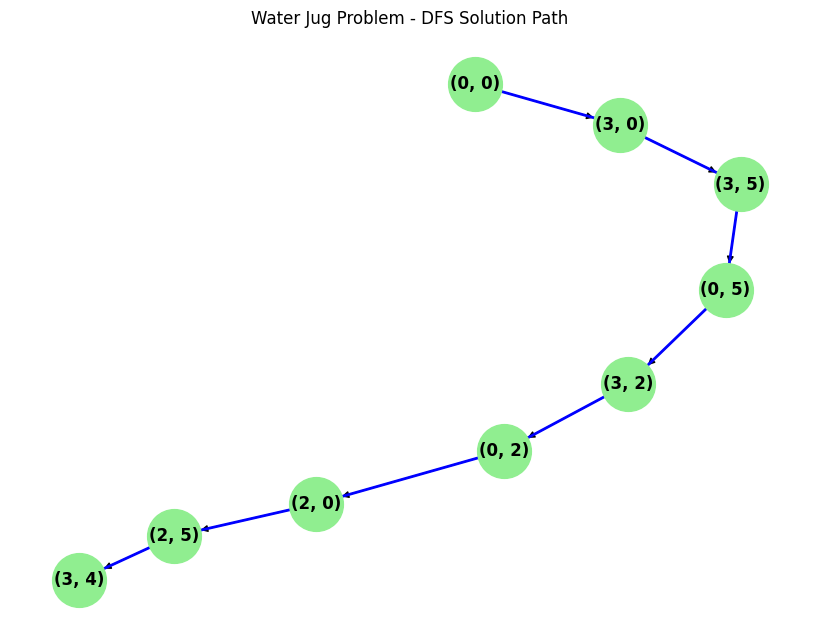

In [1]:
# Function to perform DFS to solve the water jug problem
def water_jug_dfs(capacity1, capacity2, target):
    visited = set()  # To track visited states
    path = []  # To store the solution path

    def dfs(jug1, jug2):
        # If we have already visited this state, return False (avoid cycles)
        if (jug1, jug2) in visited:
            return False

        # Mark the state as visited
        visited.add((jug1, jug2))

        # Append the current state to the path
        path.append((jug1, jug2))

        # If the target is achieved in either jug, return True
        if jug1 == target or jug2 == target:
            return True

        # Explore all possible transitions (DFS recursive calls)
        # Fill 3-liter jug
        if dfs(3, jug2):
            return True
        # Fill 5-liter jug
        if dfs(jug1, 5):
            return True
        # Empty 3-liter jug
        if dfs(0, jug2):
            return True
        # Empty 5-liter jug
        if dfs(jug1, 0):
            return True
        # Pour water from 3-liter jug into 5-liter jug
        if dfs(max(0, jug1 - (5 - jug2)), min(5, jug1 + jug2)):
            return True
        # Pour water from 5-liter jug into 3-liter jug
        if dfs(min(3, jug1 + jug2), max(0, jug2 - (3 - jug1))):
            return True

        # If none of the transitions lead to the goal, backtrack
        path.pop()
        return False

    # Start DFS from the initial state (0, 0)
    dfs(0, 0)

    # If we found a solution, return the path
    return path

# Example Usage
capacity1 = 3  # Capacity of the 3-liter jug
capacity2 = 5  # Capacity of the 5-liter jug
target = 4     # Target amount to measure

solution = water_jug_dfs(capacity1, capacity2, target)

if solution:
    print("Solution steps:")
    for step in solution:
        print(step)
else:
    print("No solution found.")

import matplotlib.pyplot as plt
import networkx as nx

# Function to create and visualize the state space transitions for DFS
def visualize_dfs_solution(solution):
    G = nx.DiGraph()

    # Add the nodes and edges based on the DFS solution path
    for i in range(len(solution) - 1):
        G.add_edge(solution[i], solution[i + 1])

    pos = nx.spring_layout(G)  # Position the nodes for visualization

    plt.figure(figsize=(8, 6))

    # Draw the graph with nodes and labels
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='blue', width=2)

    plt.title("Water Jug Problem - DFS Solution Path")
    plt.show()

# Visualize the DFS solution
if solution:
    visualize_dfs_solution(solution)

EXP 3-DEPTH FIRST SEARCH

In [5]:
from collections import defaultdict

# This class represents a directed graph using
# adjacency list representation
class Graph:

    # Constructor
    def __init__(self):

        # Default dictionary to store graph
        self.graph = defaultdict(list)


    # Function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)


    # A function used by DFS
    def DFSUtil(self, v, visited):

        # Mark the current node as visited
        # and print it
        visited.add(v)
        print(v, end=' ')

        # Recur for all the vertices
        # adjacent to this vertex
        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.DFSUtil(neighbour, visited)


    # The function to do DFS traversal. It uses
    # recursive DFSUtil()
    def DFS(self, v):

        # Create a set to store visited vertices
        visited = set()

        # Call the recursive helper function
        # to print DFS traversal
        self.DFSUtil(v, visited)


# Driver's code
if __name__ == "__main__":
    g = Graph()
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 3)

    print("Following is Depth First Traversal (starting from vertex 2)")

    # Function call
    g.DFS(2)

Following is Depth First Traversal (starting from vertex 2)
2 0 1 3 

EXP 4-A* SEARCH

In [6]:
# Python program for A* Search Algorithm
import math
import heapq

# Define the Cell class


class Cell:
    def __init__(self):
      # Parent cell's row index
        self.parent_i = 0
    # Parent cell's column index
        self.parent_j = 0
 # Total cost of the cell (g + h)
        self.f = float('inf')
    # Cost from start to this cell
        self.g = float('inf')
    # Heuristic cost from this cell to destination
        self.h = 0


# Define the size of the grid
ROW = 9
COL = 10

# Check if a cell is valid (within the grid)


def is_valid(row, col):
    return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked


def is_unblocked(grid, row, col):
    return grid[row][col] == 1

# Check if a cell is the destination


def is_destination(row, col, dest):
    return row == dest[0] and col == dest[1]

# Calculate the heuristic value of a cell (Euclidean distance to destination)


def calculate_h_value(row, col, dest):
    return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

# Trace the path from source to destination


def trace_path(cell_details, dest):
    print("The Path is ")
    path = []
    row = dest[0]
    col = dest[1]

    # Trace the path from destination to source using parent cells
    while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
        path.append((row, col))
        temp_row = cell_details[row][col].parent_i
        temp_col = cell_details[row][col].parent_j
        row = temp_row
        col = temp_col

    # Add the source cell to the path
    path.append((row, col))
    # Reverse the path to get the path from source to destination
    path.reverse()

    # Print the path
    for i in path:
        print("->", i, end=" ")
    print()

# Implement the A* search algorithm


def a_star_search(grid, src, dest):
    # Check if the source and destination are valid
    if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
        print("Source or destination is invalid")
        return

    # Check if the source and destination are unblocked
    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    # Check if we are already at the destination
    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    # Initialize the closed list (visited cells)
    closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
    # Initialize the details of each cell
    cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

    # Initialize the start cell details
    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    # Initialize the open list (cells to be visited) with the start cell
    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

    # Initialize the flag for whether destination is found
    found_dest = False

    # Main loop of A* search algorithm
    while len(open_list) > 0:
        # Pop the cell with the smallest f value from the open list
        p = heapq.heappop(open_list)

        # Mark the cell as visited
        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        # For each direction, check the successors
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0),
                      (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            # If the successor is valid, unblocked, and not visited
            if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                # If the successor is the destination
                if is_destination(new_i, new_j, dest):
                    # Set the parent of the destination cell
                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")
                    # Trace and print the path from source to destination
                    trace_path(cell_details, dest)
                    found_dest = True
                    return
                else:
                    # Calculate the new f, g, and h values
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new

                    # If the cell is not in the open list or the new f value is smaller
                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        # Add the cell to the open list
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        # Update the cell details
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j

    # If the destination is not found after visiting all cells
    if not found_dest:
        print("Failed to find the destination cell")

# Driver Code


def main():
    # Define the grid (1 for unblocked, 0 for blocked)
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]

    # Define the source and destination
    src = [8, 0]
    dest = [0, 0]

    # Run the A* search algorithm
    a_star_search(grid, src, dest)


if __name__ == "__main__":
    main()

The destination cell is found
The Path is 
-> (8, 0) -> (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0) 


EXP 5-MINIMAX PROBLEM

In [7]:
# A simple Python3 program to find
# maximum score that
# maximizing player can get
import math

def minimax (curDepth, nodeIndex,
			maxTurn, scores,
			targetDepth):

	# base case : targetDepth reached
	if (curDepth == targetDepth):
		return scores[nodeIndex]

	if (maxTurn):
		return max(minimax(curDepth + 1, nodeIndex * 2,
					False, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					False, scores, targetDepth))

	else:
		return min(minimax(curDepth + 1, nodeIndex * 2,
					True, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					True, scores, targetDepth))

# Driver code
scores = [3, 5, 2, 9, 12, 5, 23, 23]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

# This code is contributed
# by rootshadow


The optimal value is : 12


EXP 5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


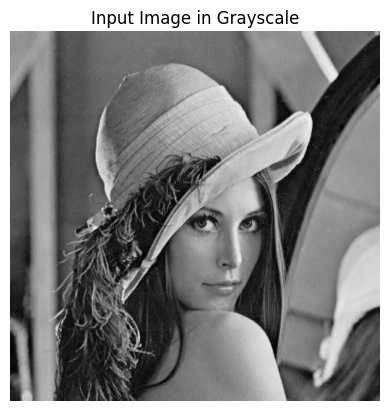

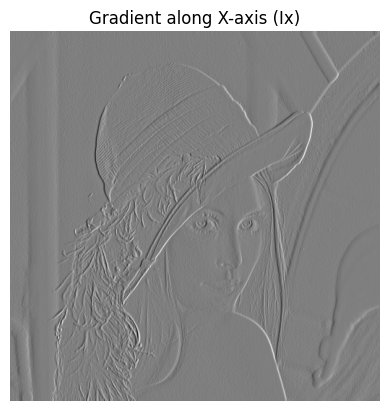

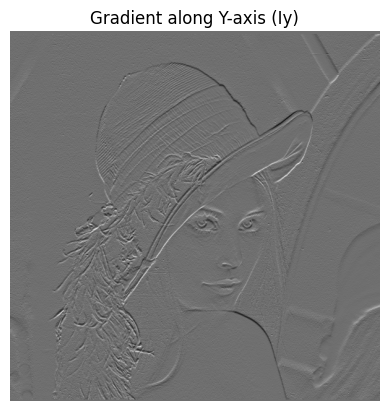

KeyboardInterrupt: 

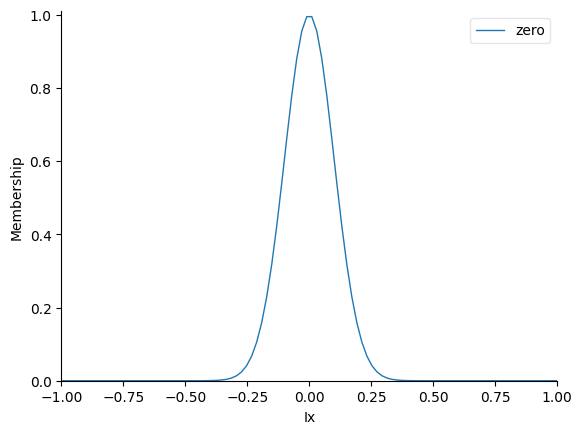

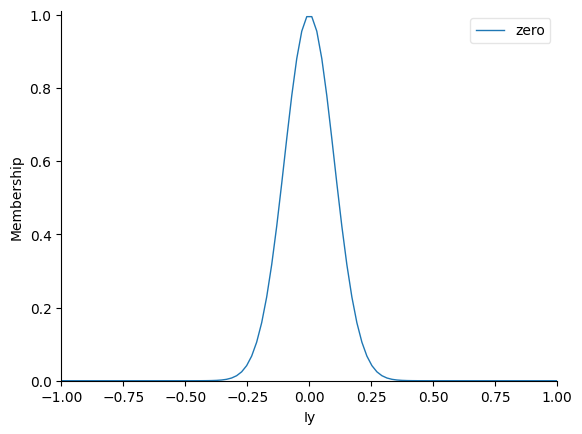

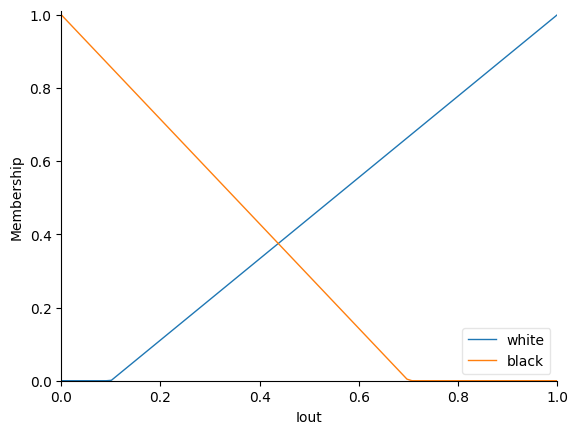

In [9]:
!pip install scikit-image scikit-fuzzy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy.ndimage import convolve
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load an example image
image_rgb = io.imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')

# Convert to grayscale
image_gray = color.rgb2gray(image_rgb)
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Input Image in Grayscale')
plt.axis('off')
plt.show()

image_double = img_as_float(image_gray)

# Define gradient filters
Gx = np.array([[-1, 1]])
Gy = np.array([[-1], [1]])

# Convolve to get gradients
Ix = convolve(image_double, Gx, mode='reflect')
Iy = convolve(image_double, Gy, mode='reflect')

# Display gradients
plt.figure()
plt.imshow(Ix, cmap='gray')
plt.title('Gradient along X-axis (Ix)')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(Iy, cmap='gray')
plt.title('Gradient along Y-axis (Iy)')
plt.axis('off')
plt.show()

# Create fuzzy variables
Ix_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Ix')
Iy_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Iy')
Iout_fuzzy = ctrl.Consequent(np.linspace(0, 1, 100), 'Iout')

# Define membership functions
Ix_fuzzy['zero'] = fuzz.gaussmf(Ix_fuzzy.universe, 0, 0.1)
Iy_fuzzy['zero'] = fuzz.gaussmf(Iy_fuzzy.universe, 0, 0.1)
Iout_fuzzy['white'] = fuzz.trimf(Iout_fuzzy.universe, [0.1, 1, 1])
Iout_fuzzy['black'] = fuzz.trimf(Iout_fuzzy.universe, [0, 0, 0.7])

# Plot membership functions
Ix_fuzzy.view()
Iy_fuzzy.view()
Iout_fuzzy.view()

rule1 = ctrl.Rule(Ix_fuzzy['zero'] & Iy_fuzzy['zero'], Iout_fuzzy['white'])
rule2 = ctrl.Rule(~(Ix_fuzzy['zero'] & Iy_fuzzy['zero']), Iout_fuzzy['black'])

# Create control system
edge_detection_ctrl = ctrl.ControlSystem([rule1, rule2])
edge_detection = ctrl.ControlSystemSimulation(edge_detection_ctrl)

edge_image = np.zeros_like(image_double)
for i in range(Ix.shape[0]):
    for j in range(Ix.shape[1]):
        edge_detection.input['Ix'] = Ix[i, j]
        edge_detection.input['Iy'] = Iy[i, j]
        edge_detection.compute()
        edge_image[i, j] = edge_detection.output['Iout']

# Display original and edge-detected images
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Detection Using Fuzzy Logic')
plt.axis('off')
plt.show()

EXP 6-IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
APPLICATION USING PYTHON - CLASSIFICATION

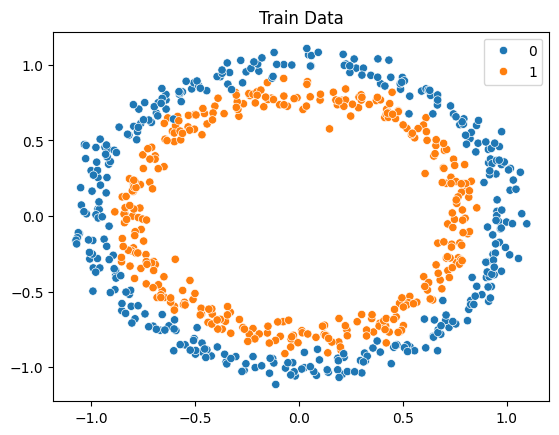

R2 Score for Training Data = 0.9857142857142858
R2 Score for Test Data = 0.9633333333333334


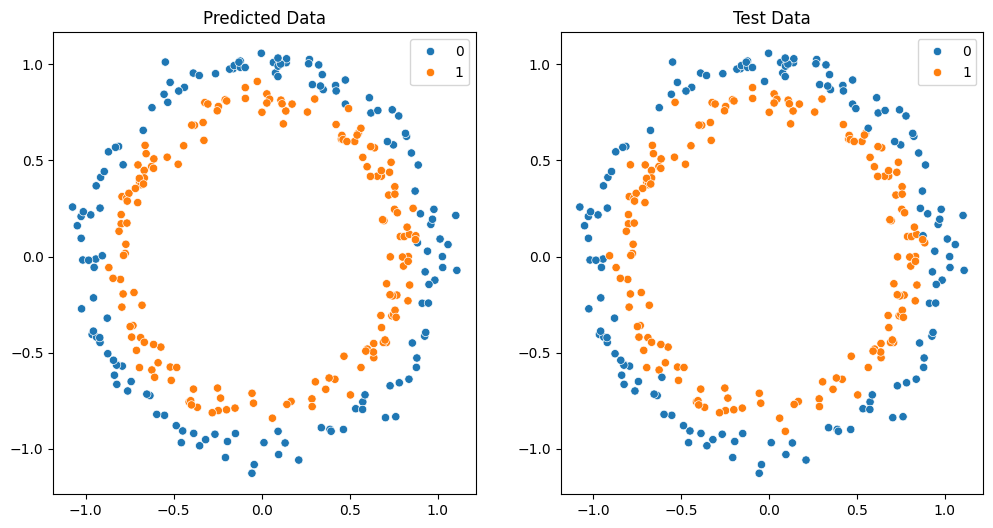

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generate dataset
X, y = make_circles(n_samples=1000, noise=0.05)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the training data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title("Train Data")
plt.show()

# Initialize and train the MLP model
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train, y_train)

# Print R2 Scores
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")

# Predict on test data
y_pred = clf.predict(X_test)

# Visualize the test data and predictions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, ax=ax[0])
ax[0].set_title("Predicted Data")

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, ax=ax[1])
ax[1].set_title("Test Data")

plt.show()


EXP 7-IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
APPLICATION USING PYTHON - REGRESSION

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generate a regression dataset
X, y = make_regression(n_samples=1000, noise=0.05, n_features=100)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Initialize and fit the model
clf = MLPRegressor(max_iter=1000)
clf.fit(X_train, y_train)

# Print R2 Scores
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")


R2 Score for Training Data = 0.9999421294169714
R2 Score for Test Data = 0.9760976455586353


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


EXP 8-DECISION TREE CLASSIFICATION

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('/content/gdrive/My Drive/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values  # Features: Age and EstimatedSalary
y = dataset.iloc[:, -1].values  # Target variable: Purchased

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid for plotting decision boundaries
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Plot decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the points on the graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


EXP 9-IMPLEMENTATION OF DECISION TREE CLASSIFICATION TECHNIQUES

In [14]:
from sklearn import tree

# Using DecisionTreeClassifier for prediction
clf = tree.DecisionTreeClassifier()

# Training data: [height, weight, shoe size]
X = [
    [181, 80, 91], [182, 90, 92], [183, 100, 92], [184, 200, 93], [185, 300, 94],
    [186, 400, 95], [187, 500, 96], [189, 600, 97], [190, 700, 98], [191, 800, 99],
    [192, 900, 100], [193, 1000, 101]
]

# Labels: gender
Y = ['male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male']

# Training the model
clf = clf.fit(X, Y)

# Making predictions
predictionf = clf.predict([[181, 80, 91]])  # Example 1
predictionm = clf.predict([[183, 100, 92]])  # Example 2

# Printing final predictions
print(f"Prediction for [181, 80, 91]: {predictionf[0]}")
print(f"Prediction for [183, 100, 92]: {predictionm[0]}")


Prediction for [181, 80, 91]: male
Prediction for [183, 100, 92]: female


EXP 10-IMPLEMENTATION OF CLUSTERING TECHNIQUES K - MEANS

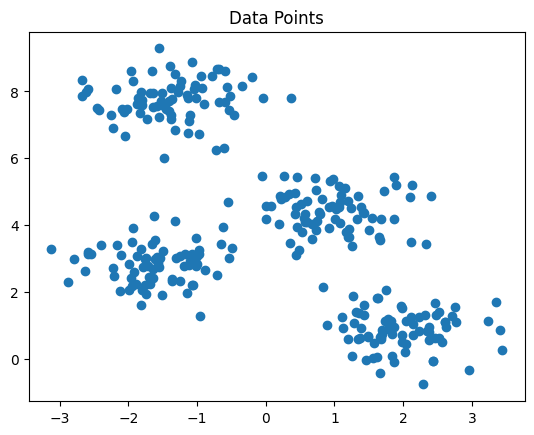

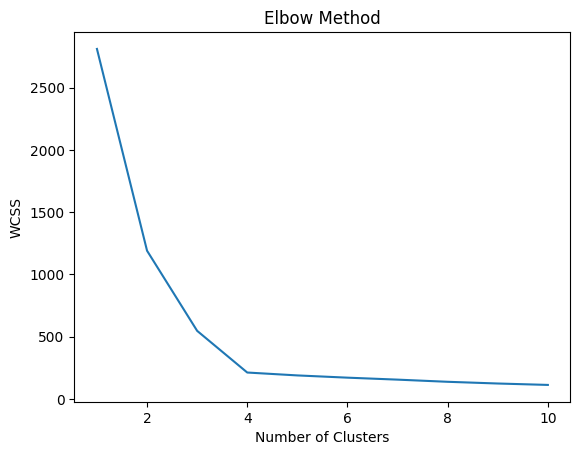

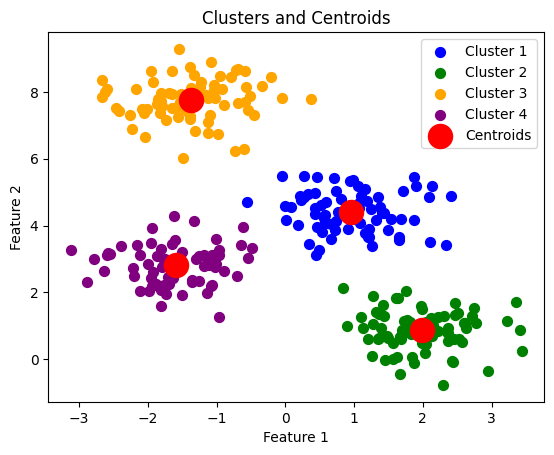

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1])
plt.title('Data Points')
plt.show()

# Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans to the dataset with optimal clusters (4 in this case)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], s=50, c='orange', label='Cluster 3')
plt.scatter(X[pred_y == 3, 0], X[pred_y == 3, 1], s=50, c='purple', label='Cluster 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
